In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
dataset_short_names = {
    'VisceralSC': 'VSC',
    'LiTS': 'LiTS',
    'BCV Cervix': 'Cvx',
    'CHAOS': 'Chaos',
    # 'CTOrg': 'CTO',
    'AbdomenCT1k': 'A1K',
    'Learn2Reg': 'L2R',
    # 'SLiver07': 'SL7',
    'AMOS': 'AMO',
    # 'Empire': 'EMP',
    'TotalSegmentator': 'TS',
    'VisceralGC': 'VGC',
    'BCV Abdomen': 'Abd'
}



In [3]:
train_labels = {
    'VisceralSC': [["spleen", "right kidney", "left kidney", "liver", "aorta", "pancreas", "trachea", "urinary bladder"], 'VSC', 127],
    'LiTS': [["liver"], 'LiTS', 126], 
    'BCV Abdomen': [["spleen", "right kidney", "left kidney", "liver", "stomach", "aorta", "pancreas"], 'Abd', 30],
    'BCV Cervix': [["urinary bladder"], 'Cvx', 30],
    'CHAOS': [["liver"], 'Chao', 20],
    'AbdomenCT1k': [["spleen", "liver", "pancreas"], 'A1k', 1000],
    'Learn2Reg': [["liver", "urinary bladder"], 'L2R', 8],
    'TotalSegmentator': [['aorta', 'duodenum', 'esophagous', 'gall bladder', 'left kidney', 'pancreas', 'right kidney', 'stomach', 'trachea', 'urinary bladder'], 'TS', 1072], 
}

test_labels = {
    'VisceralGC': [["spleen", "right kidney", "left kidney", "liver", "aorta", "pancreas", "trachea", "urinary bladder"], 'VGC', 40],
    'AMOS':[["spleen", "right kidney", "left kidney", "gall bladder", "liver", "stomach", "aorta", "pancreas", "esophagous", "duodenum"], 'TS', 200],
}

In [4]:
cp = sns.color_palette()
colors = {**{n: cp[i] for i, n in enumerate(train_labels)}, **{n: cp[i+len(train_labels)] for i, n in enumerate(test_labels)}}

In [5]:
labels = [xx for x in train_labels.values() for xx in x if type(xx) == list]
labels = [xx for x in labels for xx in x]
labels = np.unique(labels).tolist()
labels

['aorta',
 'duodenum',
 'esophagous',
 'gall bladder',
 'left kidney',
 'liver',
 'pancreas',
 'right kidney',
 'spleen',
 'stomach',
 'trachea',
 'urinary bladder']

/tmp/ipykernel_829302/3544833302.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_train.set_xticklabels([labels_short[l.get_text()] for l in ax_train.get_xticklabels()])
/tmp/ipykernel_829302/3544833302.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_test.set_xticklabels([labels_short[l.get_text()] for l in ax_test.get_xticklabels()])


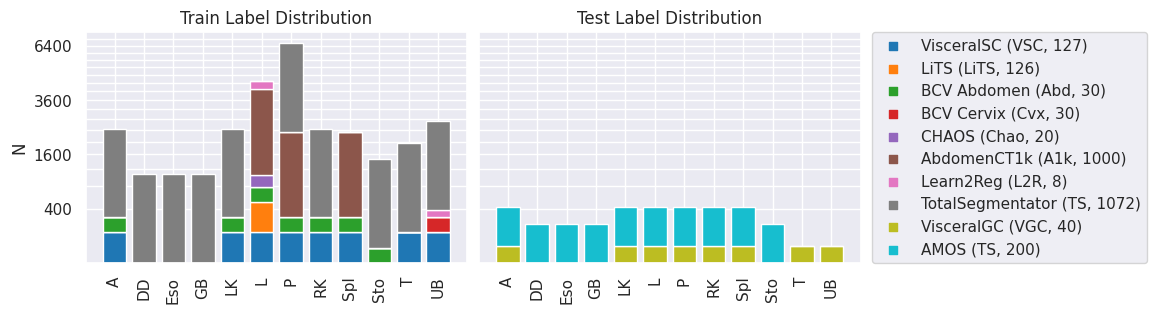

In [6]:
sns.set()

fig, (ax_train, ax_test) = plt.subplots(1,2,figsize=(10,3), sharey=True)

sizes = {
    'VisceralSC': 20,
    'LiTS': 20,
    'BCV Cervix': 10,
    'CHAOS': 10,
    # 'CTOrg': 'CTO',
    'AbdomenCT1k': 100,
    'Learn2Reg': 5,
    # 'SLiver07': 'SL7',
    'AMOS': 30,
    # 'Empire': 'EMP',
    'TotalSegmentator': 100,
    'VisceralGC': 20,
    'BCV Abdomen': 10
}

labels_long_short = {
    'aorta': 'Aorta (A)',
    'duodenum': 'Duodenum (DD)',
    'esophagous': 'Esophagus (Eso)',
    'gall bladder': 'Gall Bladder (GB)',
    # 'inferior vena cava': 'Inferior Vena Cava (IVC)',
    'left kidney': 'Left Kidney (LK)',
    'liver' : 'Liver (L)',
    'pancreas': 'Pancreas (P)',
    'right kidney': 'Right Kidney (RK)',
    'spleen': 'Spleen (Spl)',
    'stomach': 'Stomach (Sto)',
    'trachea': 'Trachea (T)',
    'urinary bladder': 'Urinary Bladder (UB)',
    'mean': 'Mean (M)'
}

labels_short = {
    'aorta': 'A',
    'duodenum': 'DD',
    'esophagous': 'Eso',
    'gall bladder': 'GB',
    # 'inferior vena cava': 'Inferior Vena Cava (IVC)',
    'left kidney': 'LK',
    'liver' : 'L',
    'pancreas': 'P',
    'right kidney': 'RK',
    'spleen': 'Spl',
    'stomach': 'Sto',
    'trachea': 'T',
    'urinary bladder': 'UB',
    'mean': 'M'
}

train_label_distribution = {l: 0 for l in labels}
for ds_name, (ds_labels, _, n) in train_labels.items():
    bottom = np.array(list(train_label_distribution.values()))
    ds_labels_plot = [np.sqrt(n) if l in ds_labels else 0 for l in labels]
    ax_train.bar(labels, ds_labels_plot, bottom=bottom, color=colors[ds_name])
    # ax2.bar(labels, ds_labels_plot, bottom=bottom, color=colors[ds_name])
    for l in ds_labels:
        train_label_distribution[l] += np.sqrt(n)
    # ax_train.set_xticks(ax_train.get_xticks(), rotation=45)
ax_train.tick_params(axis='x', rotation=90)

test_label_distribution = {l: 0 for l in labels}
for ds_name, (ds_labels, _, n) in test_labels.items():
    bottom = np.array(list(test_label_distribution.values()))
    ds_labels_plot = [np.sqrt(n) if l in ds_labels else 0 for l in labels]
    ax_test.bar(labels, ds_labels_plot, bottom=bottom, color=colors[ds_name])
    # ax2.bar(labels, ds_labels_plot, bottom=bottom)
    for l in ds_labels:
        test_label_distribution[l] += np.sqrt(n)
    # ax_train.set_xticks(ax_train.get_xticks(), rotation=45)
ax_test.tick_params(axis='x', rotation=90)

ylim = ax_train.get_ylim()
for ds_name, color in colors.items():
    short_name = (train_labels | test_labels)[ds_name][-2]
    n_samples = (train_labels | test_labels)[ds_name][-1]
    ax_test.scatter([1,2],[-1000,-1000], label=f'{ds_name} ({short_name}, {n_samples})', color=color, marker='s')
ax_test.set_ylim(ylim)
# ax_test.set_ylim(ax_train.get_ylim())
ax_test.legend(bbox_to_anchor=(1.01,1.032))

ax_train.set_xticklabels([labels_short[l.get_text()] for l in ax_train.get_xticklabels()])
ax_test.set_xticklabels([labels_short[l.get_text()] for l in ax_test.get_xticklabels()])
# ax_train.set_yticklabels([int(x**2) for x in ax_train.get_yticks()])
yticks = [np.sqrt(x) for x in np.arange(0,7200,400)]
ax_test.set_yticks(yticks)
yticklabels = [int(x**2) if int(x**2) in [400,1600,3600,6400] else '' for x in yticks]
ax_test.set_yticklabels(yticklabels) # [int(x)**2 for x in ax_test.get_yticks()])

# ax_train.set_ylabel('Number of Clients')
# ax_train.set_ylabel('$\sqrt{N}$')
ax_train.set_ylabel('N')
# ax_test.set_ylabel('N')
ax_train.set_title('Train Label Distribution')
ax_test.set_title('Test Label Distribution')
fig.subplots_adjust(wspace=0.03)
fig.savefig('/mnt/ssd/git-repos/FedUWAvg/images/label_distribution2.png', bbox_inches='tight')